In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_x = pd.read_csv("HousingData.csv",usecols=["RM","LSTAT"])

In [6]:
df_y = pd.read_csv("HousingData.csv",usecols=["MEDV"])

In [7]:
df_x.describe()

,RM,LSTAT
count,506.000000,486.000000
mean,6.284634,12.715432
std,0.702617,7.155871
min,3.561000,1.730000
25%,5.885500,7.125000
50%,6.208500,11.430000
75%,6.623500,16.955000
max,8.780000,37.970000


In [8]:
df_x

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,NaN
...,...,...
501,6.593,NaN
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [9]:
df_x.isnull()

,RM,LSTAT
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
501,False,True
502,False,False
503,False,False
504,False,False


In [10]:
df_x.isnull().sum()

RM        0
LSTAT    20
dtype: int64

# Data Preprocessing

In [11]:
x_mean = df_x['LSTAT'].mean()

In [12]:
x_mean

12.715432098765435

# Replacing Null values with mean values

In [13]:
df_x.fillna(x_mean,inplace=True)

In [14]:
df_x.isnull().sum()

RM       0
LSTAT    0
dtype: int64

# Creating the Regression Model

In [15]:
reg = linear_model.LinearRegression()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.20,random_state=2)

# Training The Model

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
print(reg.coef_)

[[ 4.9284962  -0.66818909]]


# Predicting from model

In [19]:
y_pred = reg.predict(x_test)

In [20]:
y_pred

array([[25.21683416],
       [16.59637533],
       [32.84334185],
       [28.54361069],
       [ 1.05424366],
       [ 1.73693991],
       [26.38105059],
       [25.69572627],
       [21.61116507],
       [20.7439917 ],
       [28.69369244],
       [25.99430346],
       [23.55057319],
       [16.05670565],
       [24.26646237],
       [25.53182997],
       [16.03311682],
       [12.43768584],
       [12.29225557],
       [19.81620523],
       [26.58173882],
       [21.25892395],
       [30.09561614],
       [21.62832574],
       [21.55359314],
       [19.07194895],
       [35.74674509],
       [31.41967374],
       [32.5058836 ],
       [24.48504416],
       [18.40788451],
       [24.39434111],
       [30.1459872 ],
       [27.87300222],
       [13.14563198],
       [16.60543239],
       [11.50809654],
       [22.64406811],
       [22.90735957],
       [23.39186886],
       [26.12419775],
       [13.39959328],
       [31.07335095],
       [ 4.02418095],
       [23.5805266 ],
       [20

In [21]:
y_test

,MEDV
463,20.2
152,15.3
291,37.3
183,32.5
384,8.8
...,...
200,32.9
12,21.7
129,14.3
194,29.1


# Visualing using the line graph

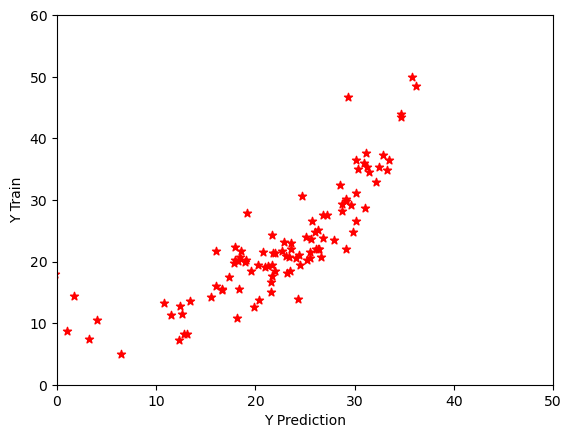

In [22]:
%matplotlib inline
plt.xlabel("Y Prediction")
plt.ylabel("Y Train")
plt.xlim(0,50)
plt.ylim(0,60)
plt.scatter(y_pred,y_test,color = "red",marker="*")

In [23]:
mse = (mean_squared_error(y_test,y_pred))

In [24]:
mse

26.50814392089616

In [25]:
rmse = np.sqrt(mse)

In [26]:
rmse

5.148606017253229

In [27]:
loss = y_pred - y_test

In [28]:
loss

,MEDV
463,5.016834
152,1.296375
291,-4.456658
183,-3.956389
384,-7.745756
...,...
200,-0.715417
12,-3.180132
129,1.220549
194,0.514325
